In [1]:
from network_evaluation_tools import gene_conversion_tools as gct
import pandas as pd
import itertools

/cellar/users/snwright/anaconda3/envs/pcnet_py3/lib/python3.10/site-packages/network_evaluation_tools-1.0.2.py3-py3.10.egg/network_evaluation_tools/gene_conversion_tools.py:23: SyntaxWarning: "is" with a literal. Did you mean "=="?
/cellar/users/snwright/anaconda3/envs/pcnet_py3/lib/python3.10/site-packages/network_evaluation_tools-1.0.2.py3-py3.10.egg/network_evaluation_tools/gene_conversion_tools.py:23: SyntaxWarning: "is" with a literal. Did you mean "=="?


In [5]:
wd = '/cellar/users/snwright/Data/Network_Analysis/'

# Version 2.0

## Load BioGRID Raw Data
#### Source (MITAB): https://downloads.thebiogrid.org/File/BioGRID/Release-Archive/BIOGRID-4.4.203/BIOGRID-ORGANISM-4.4.203.tab3.zip
Downloaded: Nov 16, 2021   
Last Updated: October. 25th, 2021  
Notes for download: There is a new version of BioGRID released on the first of every month. Download the organism specific files to extract only human interactions from the database.  
Notes for processing: This is the file for human protein interactions, however, not all interactions may be human-human interactions. These need to be filtered. There is a column for "Score" filtering, but it seems that most of these values are missing so they will be ignored for processing BioGRID

In [19]:
BioGRID_Raw = pd.read_csv(wd+'Network_Data_Raw/BIOGRID/BIOGRID-ORGANISM-Homo_sapiens-4.4.203.tab3.txt',sep='\t', low_memory=False)
print('Raw edge count in BioGRID:', len(BioGRID_Raw))

Raw edge count in BioGRID: 961326


In [55]:
# Show not all interactions in BioGRID are physical PPI, though the overwhelming majority are
phys = BioGRID_Raw['Experimental System Type'].value_counts()
print(phys)
print("\nPercent physical:", round(phys["physical"]/sum(phys), 5))

physical    949337
genetic      11989
Name: Experimental System Type, dtype: int64

Percent physical: 0.98753


In [56]:
# Not all interactions are from Human
spec = BioGRID_Raw['Organism ID Interactor A'].value_counts().head()
print(spec)
print("\nPercent human:", round(spec[9606]/sum(spec), 5))

9606       909748
2697049     20096
10090       19506
559292       2421
11676        1836
Name: Organism ID Interactor A, dtype: int64

Percent human: 0.95401


In [57]:
# Not all interactions are from Human
spec = BioGRID_Raw['Organism ID Interactor B'].value_counts().head()
print(spec)
print("\nPercent human:", round(spec[9606]/sum(spec), 5))

9606      951674
10090       4813
559292      1139
10116       1003
284812       586
Name: Organism ID Interactor B, dtype: int64

Percent human: 0.99214


In [40]:
BioGRID_Human_Only = BioGRID_Raw[(BioGRID_Raw['Organism ID Interactor A']==9606) & (BioGRID_Raw['Organism ID Interactor B']==9606)]
print('Human-Human only interactions in BioGRID 4.4.203:', len(BioGRID_Human_Only))

Human-Human only interactions in BioGRID 4.4.203: 900096


In [41]:
# Any missing symbol names in column A?
BioGRID_Human_Only['Official Symbol Interactor A'][BioGRID_Human_Only['Official Symbol Interactor A']=='-']

Series([], Name: Official Symbol Interactor A, dtype: object)

In [42]:
# Any missing symbol names in column B?
BioGRID_Human_Only['Official Symbol Interactor B'][BioGRID_Human_Only['Official Symbol Interactor B']=='-']

Series([], Name: Official Symbol Interactor B, dtype: object)

In [43]:
# Convert table of interactions to edgelist (no scores given)
# Also no gene symbol conversion necessary because network is given in symbol format already
BioGRID_edgelist = BioGRID_Human_Only[['Official Symbol Interactor A', 'Official Symbol Interactor B']].values.tolist()
print('Edges in BioGRID:', len(BioGRID_edgelist))

Edges in BioGRID: 900096


In [18]:
# Save genelist to file
outdir = wd+'Processed_Data/Network_SIFs_Symbol/'
gct.write_edgelist(BioGRID_edgelist_filt_v1, outdir+'BioGRID_Symbol_3_4_149.sif')

Edge list saved: 0.07 seconds


In [44]:
# Sort each edge representation for filtering
BioGRID_edgelist_sorted = [sorted(edge) for edge in BioGRID_edgelist]

In [45]:
# Filter edgelist for duplicate nodes and for self-edges
BioGRID_edgelist_filt = gct.filter_converted_edgelist(BioGRID_edgelist_sorted)

900096 input edges
7039 self-edges removed
0 edges with un-mapped genes removed
224009 duplicate edges removed
Edge list filtered: 0.66 seconds
669048 Edges remaining


In [46]:
# Save genelist to file
outdir = wd+'Processed_Data/Network_SIFs_Symbol/'
gct.write_edgelist(BioGRID_edgelist_filt, outdir+'BioGRID_Symbol_4_4_203.sif')

Edge list saved: 0.17 seconds


# Version 1.0 (original)

## Load BioGRID Raw Data
#### Source (MITAB): http://thebiogrid.org/downloads/archives/Release%20Archive/BIOGRID-3.4.149/BIOGRID-ORGANISM-3.4.149.tab2.zip
Downloaded: June 15, 2017  
Last Updated: June 01, 2017  
Notes for download: There is a new verision of BioGRID released on the first of every month. Download the organism specific files to extract only human interactions from the database.  
Notes for processing: This is the file for human protein interactions, however, not all interactions may be human-human interactions. These need to be filtered. There is a column for "Score" filtering, but it seems that most of these values are missing so they will be ignored for processing BioGRID

In [21]:
BioGRID_Raw_v1 = pd.read_csv(wd+'Network_Data_Raw/BIOGRID/BIOGRID-ORGANISM-Homo_sapiens-3.4.149.tab2.txt',sep='\t', low_memory=False)
print('Raw edge count in BioGRID_v1:', len(BioGRID_Raw_v1))

Raw edge count in BioGRID: 394749


In [52]:
# Show not all interactions in BioGRID are physical PPI, though the overwhelming majority are
phys = BioGRID_Raw_v1['Experimental System Type'].value_counts()
print(phys)
print("\nPercent physical:", round(phys["physical"]/sum(phys), 5))

physical    392779
genetic       1970
Name: Experimental System Type, dtype: int64

Percent physical: 0.99501


In [53]:
# Not all interactions are from Human
spec = BioGRID_Raw_v1['Organism Interactor A'].value_counts().head()
print(spec)
print("\nPercent human:", round(spec[9606]/sum(spec), 5))

9606      372979
10090      17963
11676       1591
10116        570
559292       355
Name: Organism Interactor A, dtype: int64

Percent human: 0.94795


In [54]:
# Not all interactions are from Human
spec = BioGRID_Raw_v1['Organism Interactor B'].value_counts().head()
print(spec)
print("\nPercent human:", round(spec[9606]/sum(spec), 5))

9606      389334
10090       2543
559292      1045
10116        708
11676        318
Name: Organism Interactor B, dtype: int64

Percent human: 0.98829


#### Since there are so few genetic interactions relative to physical interactions, we will not filter these edges. However, we will filter all interactions that are not labelled as human-human interactions

#### Keep only human-human interactions

In [80]:
BioGRID_Human_Only_v1 = BioGRID_Raw_v1[(BioGRID_Raw_v1['Organism Interactor A']==9606) & (BioGRID_Raw_v1['Organism Interactor B']==9606)]
print('Human-Human only interactions in BioGRID 3.4.149:', len(BioGRID_Human_Only_v1))

Human-Human only interactions in BioGRID 3.4.149: 367564


In [81]:
# Any missing symbol names in column A?
BioGRID_Human_Only_v1['Official Symbol Interactor A'][BioGRID_Human_Only_v1['Official Symbol Interactor A']=='-']

Series([], Name: Official Symbol Interactor A, dtype: object)

In [82]:
# Any missing symbol names in column B?
BioGRID_Human_Only_v1['Official Symbol Interactor B'][BioGRID_Human_Only_v1['Official Symbol Interactor B']=='-']

Series([], Name: Official Symbol Interactor B, dtype: object)

In [83]:
# Convert table of interactions to edgelist (no scores given)
# Also no gene symbol conversion necessary because network is given in symbol format already
BioGRID_edgelist_v1 = BioGRID_Human_Only_v1[['Official Symbol Interactor A', 'Official Symbol Interactor B']].values.tolist()
print('Edges in BioGRID:', len(BioGRID_edgelist_v1))

Edges in BioGRID: 367564


In [84]:
# Sort each edge representation for filtering
BioGRID_edgelist_sorted_v1 = [sorted(edge) for edge in BioGRID_edgelist_v1]

In [85]:
# Filter edgelist for duplicate nodes and for self-edges
BioGRID_edgelist_filt_v1 = gct.filter_converted_edgelist(BioGRID_edgelist_sorted_v1)

367564 input edges
4598 self-edges removed
0 edges with un-mapped genes removed
104709 duplicate edges removed
Edge list filtered: 0.17 seconds
258257 Edges remaining


In [86]:
# Save genelist to file
outdir = wd+'Processed_Data/Network_SIFs_Symbol/'
gct.write_edgelist(BioGRID_edgelist_filt_v1, outdir+'BioGRID_Symbol_3_4_149.sif')

Edge list saved: 0.07 seconds


# Changes

## Data Structure

**Columns renamed:**
* Organism Interactor A -> Organism ID Interactor A
* Organism Interactor B -> Organism ID Interactor B  
* Phenotypes -> Ontology Term Names

**Columns reworked:**
* Pubmed ID -> Publication Source
 * Format: `id(int)` -> `source:id(string)`

**New Columns**
* Ontology Term [IDs, Categories, Qualifier IDs, Qualifier Names, Types]
* Organism Name Interactor [A/B]
* [SWISS-PROT/TREMBL/REFSEQ] Accessions Interactor [A/B]


## Nodes/Edges

In [98]:

stats = pd.DataFrame({"v1":[394749, 367564, 258257, 99.5, 94.8, 98.8], 
                           "v2":[961326, 960096, 669048,98.8, 95.4, 99.2]},
                           index=["input", "human_human", "filtered", "physical", "humanA", "humanB"])

In [99]:
v1_nodes = set(BioGRID_Human_Only_v1["Official Symbol Interactor A"].values).union(set(BioGRID_Human_Only_v1["Official Symbol Interactor B"].values))
v2_nodes = set(BioGRID_Human_Only["Official Symbol Interactor A"].values).union(set(BioGRID_Human_Only["Official Symbol Interactor B"].values))
new_nodes = v2_nodes.difference(v1_nodes)
print(len(new_nodes) == len(v2_nodes) - len(v1_nodes))
stats = stats.append(pd.DataFrame({"v1":len(v1_nodes), "v2":len(v2_nodes)}, index=["nodes"]))

True


<AxesSubplot:ylabel='Number of nodes'>

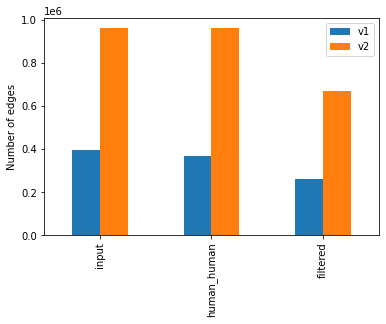

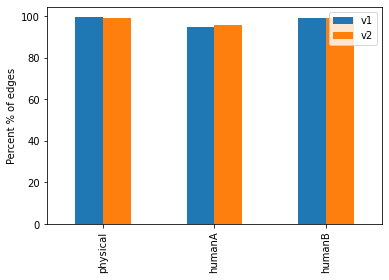

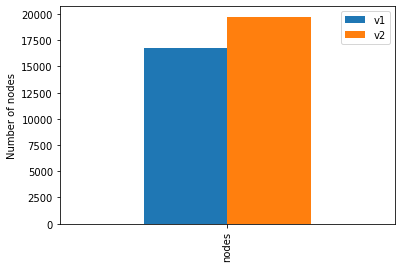

In [100]:
stats.loc[["input", "human_human", "filtered"]].plot.bar(ylabel="Number of edges")
stats.loc[["physical", "humanA", "humanB"]].plot.bar(ylabel="Percent % of edges")
stats.loc[["nodes"]].plot.bar(ylabel="Number of nodes")

array(['-', '1.0', '0.952', ..., '0.995751891', '0.978833402',
       '0.996471144'], dtype=object)